In [125]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca file data dari pc
data_path = 'D:\Dokumen\TELKOM UNIVERSITY\TF-43-03\Semester 8\Tugas Akhir\Data Alat Ukur\Data Komparasi'
filename = '/Data_DL_TurunHujan_GKU.xlsx'
sheet_name = 'Data Hujan 2'

# Membaca file Excel dan membuat objek
xls = pd.ExcelFile(data_path + filename)

# Konfigurasi penyimpanan file hasil validasi dan rata-rata 
namasheet ='DH2'
savedfile = "\GKU_DL_KKMZS_" + namasheet + ".xlsx"

# Membaca sheet file excel yang telah dibuat
df1 = pd.read_excel(xls, sheet_name=sheet_name)

# Memanggil dataframe
df1

,Tanggal,Waktu,pH,Konduktivitas,TDS,Curah Hujan,Temperatur Air
0,2023-05-21,00:00:10,4.0,1.800,0.52,0.0000,25.69
1,2023-05-21,00:00:30,2.3,1.300,0.40,0.0000,25.69
2,2023-05-21,00:00:53,3.5,2.000,0.13,0.0000,25.63
3,2023-05-21,00:01:10,3.7,1.400,0.79,0.0000,25.69
4,2023-05-21,00:01:30,2.7,2.000,0.80,0.0000,25.63
...,...,...,...,...,...,...,...
8526,2023-05-22,23:58:25,6.5,1.281,59.80,0.0568,24.43
8527,2023-05-22,23:58:45,6.9,1.266,64.53,0.0568,25.13
8528,2023-05-22,23:59:05,6.8,1.255,58.89,0.0568,24.93
8529,2023-05-22,23:59:25,6.4,1.254,61.70,0.0568,25.32


In [126]:
# Melihat karakteristik dari data
df1.describe()

,pH,Konduktivitas,TDS,Curah Hujan,Temperatur Air
count,8531.000000,8531.000000,8531.000000,8531.000000,8531.000000
mean,5.074001,1.435179,42.537300,0.337172,26.009437
std,1.850614,0.214850,34.591142,0.395297,2.964671
min,1.000000,1.000000,0.100000,0.000000,22.940000
25%,3.600000,1.300000,0.680000,0.000000,24.470000
50%,6.000000,1.419000,60.230000,0.042600,25.150000
75%,6.500000,1.490000,73.830000,0.833068,25.750000
max,7.000000,2.000000,80.000000,0.833068,35.500000


In [127]:
## Penanganan kolom pada dataframe untuk validasi

In [128]:
# Menggabungkan kolom 'Tanggal' dan 'Waktu' menjadi satu kolom 'Timestamp'
df1['Waktu'] = pd.to_datetime(df1['Waktu'], format='%H:%M:%S').dt.time
df1['Timestamp'] = pd.to_datetime(df1['Tanggal'].astype(str) + ' ' + df1['Waktu'].astype(str))

# Memindahkan kolom 'Timestamp' ke depan
timestamp_col = df1.pop('Timestamp')
df1.insert(0, 'Timestamp', timestamp_col)

# Menghapus kolom 'Tanggal' dan 'Waktu' dari DataFrame
df1 = df1.drop(['Tanggal', 'Waktu', 'Curah Hujan'], axis=1)

# Mengganti nama kolom 'Konduktivitas' menjadi 'EC' dan 'Temperatur Air' menjadi 'TA'
df1 = df1.rename(columns={'Konduktivitas': 'EC', 'Temperatur Air': 'TA'})

# Membuat dataframe dengan isi 'Timestamp' untuk pengolahan file yang disimpan
dfx = df1['Timestamp']

# Menampilkan DataFrame
df1

,Timestamp,pH,EC,TDS,TA
0,2023-05-21 00:00:10,4.0,1.800,0.52,25.69
1,2023-05-21 00:00:30,2.3,1.300,0.40,25.69
2,2023-05-21 00:00:53,3.5,2.000,0.13,25.63
3,2023-05-21 00:01:10,3.7,1.400,0.79,25.69
4,2023-05-21 00:01:30,2.7,2.000,0.80,25.63
...,...,...,...,...,...
8526,2023-05-22 23:58:25,6.5,1.281,59.80,24.43
8527,2023-05-22 23:58:45,6.9,1.266,64.53,25.13
8528,2023-05-22 23:59:05,6.8,1.255,58.89,24.93
8529,2023-05-22 23:59:25,6.4,1.254,61.70,25.32


In [129]:
##  Menampilkan sebaran data dari raw data dengan boxplot

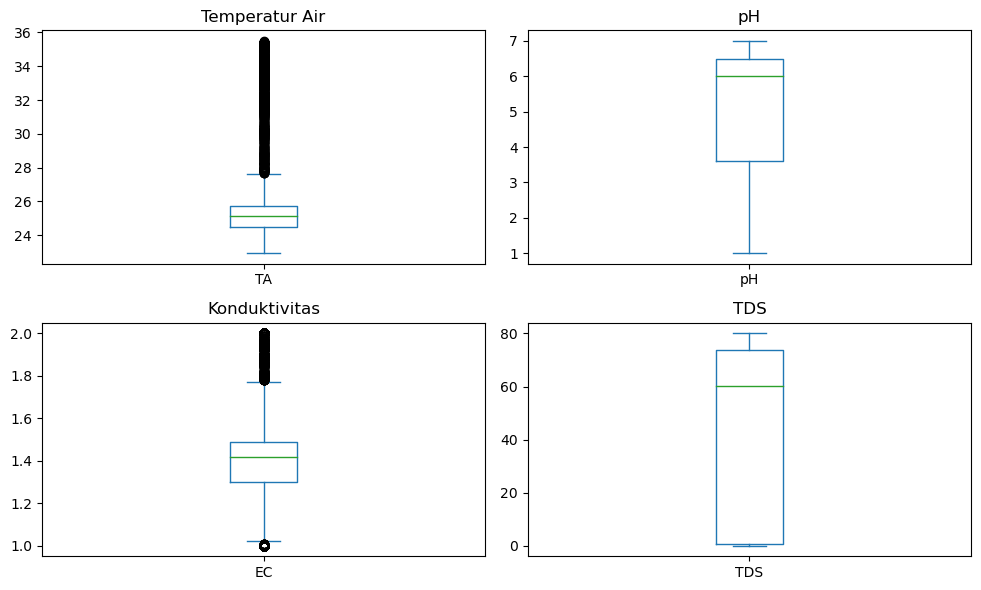

In [130]:
# Membuat subplots dengan 2 kolom
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

# Menampilkan boxplot untuk kolom "Temperatur Air" pada subplot pertama
df1['TA'].plot(kind='box', ax=axes[0, 0])
axes[0, 0].set_title('Temperatur Air')

# Menampilkan boxplot untuk kolom "pH" pada subplot kedua
df1['pH'].plot(kind='box', ax=axes[0, 1])
axes[0, 1].set_title('pH')

# Menampilkan boxplot untuk kolom "Konduktivitas" pada subplot ketiga
df1['EC'].plot(kind='box', ax=axes[1, 0])
axes[1, 0].set_title('Konduktivitas')

# Menampilkan boxplot untuk kolom "TDS" pada subplot keempat
df1['TDS'].plot(kind='box', ax=axes[1, 1])
axes[1, 1].set_title('TDS')

# Menyesuaikan jarak vertikal antara subplot
plt.subplots_adjust(hspace=0.5)

# # Menyimpan gambar dalam format PNG
# plt.savefig('boxplot_05juni.png', dpi=400)

# Menampilkan layout subplot
plt.tight_layout()

# Menampilkan boxplot secara terpisah
plt.show()

In [131]:
## Validasi Kontrol Kualitas

In [132]:
# Menghitung jumlah baris sebelum outrangenya dihapus 
pH_outrange_sebelum = df1['pH'].shape[0]
EC_outrange_sebelum = df1['EC'].shape[0]
TDS_outrange_sebelum = df1['TDS'].shape[0]
TA_outrange_sebelum = df1['TA'].shape[0]

In [133]:
# Kontrol kualitas pH
df1['pH'] = df1['pH'].apply(pd.to_numeric, errors='coerce').fillna(0).astype(float).dropna()
df6 = df1[(df1['pH']>= 0) &  (df1['pH'] <= 14)]
df6 = df6[['Timestamp','pH']]

# Kontrol kualitas konduktivitas
df1['EC'] = df1['EC'].apply(pd.to_numeric, errors='coerce').fillna(0).astype(float).dropna()
df7 = df1[(df1['EC']>= 0) &  (df1['EC'] <= 20)]
df7 = df7[['Timestamp','EC']]

# Kontrol kualitas TDS
df1['TDS'] = df1['TDS'].apply(pd.to_numeric, errors='coerce').fillna(0).astype(float).dropna()
df8 = df1[(df1['TDS']>= 0) &  (df1['TDS'] <= 1000)]
df8 = df8[['Timestamp','TDS']]

# Kontrol kualitas temperatur air
df1['TA'] = df1['TA'].apply(pd.to_numeric, errors='coerce').fillna(0).astype(float).dropna()
df9 = df1[(df1['TA']>= 24) &  (df1['TA'] <= 26)]
df9 = df9[['Timestamp','TA']]

In [134]:
# Menghitung jumlah baris setelah outrangenya dihapus 
pH_outrange_sesudah = df6['pH'].shape[0]
EC_outrange_sesudah = df7['EC'].shape[0]
TDS_outrange_sesudah = df8['TDS'].shape[0]
TA_outrange_sesudah = df9['TA'].shape[0]

# Menghitung jumlah outrange yang terhapus
pH_outrange_terhapus = pH_outrange_sebelum - pH_outrange_sesudah
EC_outrange_terhapus = EC_outrange_sebelum - EC_outrange_sesudah
TDS_outrange_terhapus = TDS_outrange_sebelum - TDS_outrange_sesudah
TA_outrange_terhapus = TA_outrange_sebelum - TA_outrange_sesudah

# Menampilkan pesan
print("Jumlah outrange pH yang terhapus:", pH_outrange_terhapus)
print("Jumlah outrange EC yang terhapus:", EC_outrange_terhapus)
print("Jumlah outrange TDS yang terhapus:", TDS_outrange_terhapus)
print("Jumlah outrange TA yang terhapus:", TA_outrange_terhapus)

Jumlah outrange pH yang terhapus: 0
Jumlah outrange EC yang terhapus: 0
Jumlah outrange TDS yang terhapus: 0
Jumlah outrange TA yang terhapus: 1907


In [135]:
# Menggabungkan seluruh dataframe hasil kontrol kualitas dengan merge waktu yang sama (outer join)
df_validasi_1 = pd.merge(df6, df7, on='Timestamp', how='outer')
df_validasi_1 = pd.merge(df_validasi_1, df8, on='Timestamp', how='outer')
df_validasi_1 = pd.merge(df_validasi_1, df9, on='Timestamp', how='outer')

# Duplikat dataframe
df_validasi_kontrol_kualitas = df_validasi_1

# Menampilkan dataframe
df_validasi_1

,Timestamp,pH,EC,TDS,TA
0,2023-05-21 00:00:10,4.0,1.800,0.52,25.69
1,2023-05-21 00:00:30,2.3,1.300,0.40,25.69
2,2023-05-21 00:00:53,3.5,2.000,0.13,25.63
3,2023-05-21 00:01:10,3.7,1.400,0.79,25.69
4,2023-05-21 00:01:30,2.7,2.000,0.80,25.63
...,...,...,...,...,...
8526,2023-05-22 23:58:25,6.5,1.281,59.80,24.43
8527,2023-05-22 23:58:45,6.9,1.266,64.53,25.13
8528,2023-05-22 23:59:05,6.8,1.255,58.89,24.93
8529,2023-05-22 23:59:25,6.4,1.254,61.70,25.32


In [136]:
## Inisialisasi fungsi validasi Modified Z-Score

In [137]:
# Fungsi untuk menghitung IQR
def calculate_iqr(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    return iqr

# Fungsi untuk menghitung Modified Z-Score
def calculate_modified_zscore(column):
    median = column.median()
    iqr = calculate_iqr(column)
    modified_zscore = 0.6745 * (column - median) / iqr
    return modified_zscore

# Fungsi untuk mengidentifikasi outlier berdasarkan nilai Modified Z-Score
def identify_outliers_zscore_modified(column, threshold):
    modified_zscore = calculate_modified_zscore(column)
    abs_modified_zscore = modified_zscore.abs()
    return abs_modified_zscore > threshold

In [138]:
## Penentuan threshold Modified Z-Score dan indentifikasi outlier pada data

In [139]:
# Menghitung Modified Z-Score untuk setiap parameter
modified_zscore_pH = calculate_modified_zscore(df_validasi_1['pH'])
modified_zscore_EC = calculate_modified_zscore(df_validasi_1['EC'])
modified_zscore_TDS = calculate_modified_zscore(df_validasi_1['TDS'])
modified_zscore_TA = calculate_modified_zscore(df_validasi_1['TA'])

# Mengidentifikasi outlier untuk setiap parameter
outliers_ph = identify_outliers_zscore_modified(df_validasi_1['pH'], 1.5)
outliers_ec = identify_outliers_zscore_modified(df_validasi_1['EC'], 1.0)
outliers_tds = identify_outliers_zscore_modified(df_validasi_1['TDS'], 1.5)
outliers_ta = identify_outliers_zscore_modified(df_validasi_1['TA'], 1.5)

In [140]:
## Manajemen penyimpanan data hasil validasi kedalam dataframe

In [141]:
# Menambahkan kolom 'Modified Z-Score' dan 'Outlier' ke dalam dataFrame lama
df_validasi_1['Modified Z-Score (pH)'] = modified_zscore_pH
df_validasi_1['Modified Z-Score (EC)'] = modified_zscore_EC
df_validasi_1['Modified Z-Score (TDS)'] = modified_zscore_TDS
df_validasi_1['Modified Z-Score (TA)'] = modified_zscore_TA
df_validasi_1['Outlier (pH)'] = outliers_ph
df_validasi_1['Outlier (EC)'] = outliers_ec
df_validasi_1['Outlier (TDS)'] = outliers_tds
df_validasi_1['Outlier (TA)'] = outliers_ta

# Membuat dataFrame baru dengan kolom yang diperlukan
df_outlier_pH_new = df_validasi_1.loc[:, ['Timestamp', 'pH', 'Modified Z-Score (pH)', 'Outlier (pH)']]
df_outlier_EC_new = df_validasi_1.loc[:, ['Timestamp', 'EC', 'Modified Z-Score (EC)', 'Outlier (EC)']]
df_outlier_TDS_new = df_validasi_1.loc[:, ['Timestamp', 'TDS', 'Modified Z-Score (TDS)', 'Outlier (TDS)']]
df_outlier_TA_new = df_validasi_1.loc[:, ['Timestamp', 'TA', 'Modified Z-Score (TA)', 'Outlier (TA)']]

,Timestamp,pH,Modified Z-Score (pH),Outlier (pH)
0,2023-05-21 00:00:10,4.0,-0.465172,False
1,2023-05-21 00:00:30,2.3,-0.860569,False
2,2023-05-21 00:00:53,3.5,-0.581466,False
3,2023-05-21 00:01:10,3.7,-0.534948,False
4,2023-05-21 00:01:30,2.7,-0.767534,False
...,...,...,...,...
8526,2023-05-22 23:58:25,6.5,0.116293,False
8527,2023-05-22 23:58:45,6.9,0.209328,False
8528,2023-05-22 23:59:05,6.8,0.186069,False
8529,2023-05-22 23:59:25,6.4,0.093034,False


In [142]:
## Penggabungan dataframe keseluruhan hasil validasi

In [143]:
# Menggabungkan seluruh dataframe parameter (outlier tidak dihapus) dengan 'Timestamp' data mentah
df_data_pH_1 = pd.merge(dfx, df_outlier_pH_new, on='Timestamp', how='outer')
df_data_EC_1 = pd.merge(dfx, df_outlier_EC_new, on='Timestamp', how='outer')
df_data_TDS_1 = pd.merge(dfx, df_outlier_TDS_new, on='Timestamp', how='outer')
df_data_TA_1 = pd.merge(dfx, df_outlier_TA_new, on='Timestamp', how='outer')

In [144]:
## Penangangan Outlier

In [145]:
# Menghitung jumlah baris sebelum outliernya dihapus 
pH_outlier_sebelum = df_outlier_pH_new.shape[0]
EC_outlier_sebelum = df_outlier_EC_new.shape[0]
TDS_outlier_sebelum = df_outlier_TDS_new.shape[0]
TA_outlier_sebelum = df_outlier_TA_new.shape[0]

In [146]:
# Menghapus baris yang merupakan outlier (Outlier () == True) 
df_outlier_pH_new = df_outlier_pH_new[df_outlier_pH_new['Outlier (pH)'] == False]
df_outlier_EC_new = df_outlier_EC_new[df_outlier_EC_new['Outlier (EC)'] == False]
df_outlier_TDS_new = df_outlier_TDS_new[df_outlier_TDS_new['Outlier (TDS)'] == False]
df_outlier_TA_new = df_outlier_TA_new[df_outlier_TA_new['Outlier (TA)'] == False]

In [147]:
# Menghitung jumlah baris setelah outliernya dihapus 
pH_outlier_sesudah = df_outlier_pH_new.shape[0]
EC_outlier_sesudah = df_outlier_EC_new.shape[0]
TDS_outlier_sesudah = df_outlier_TDS_new.shape[0]
TA_outlier_sesudah = df_outlier_TA_new.shape[0]

# Menghitung jumlah outlier yang terhapus
pH_outlier_terhapus = pH_outlier_sebelum - pH_outlier_sesudah
EC_outlier_terhapus = EC_outlier_sebelum - EC_outlier_sesudah
TDS_outlier_terhapus = TDS_outlier_sebelum - TDS_outlier_sesudah
TA_outlier_terhapus = TA_outlier_sebelum - TA_outlier_sesudah

# Menampilkan pesan
print("Jumlah outlier pH yang terhapus:", pH_outlier_terhapus)
print("Jumlah outlier EC yang terhapus:", EC_outlier_terhapus)
print("Jumlah outlier TDS yang terhapus:", TDS_outlier_terhapus)
print("Jumlah outlier TA yang terhapus:", TA_outlier_terhapus)

Jumlah outlier pH yang terhapus: 0
Jumlah outlier EC yang terhapus: 1573
Jumlah outlier TDS yang terhapus: 0
Jumlah outlier TA yang terhapus: 0


In [148]:
# Menggabungkan seluruh dataframe parameter (outlier dihapus) dengan 'Timestamp' data mentah
df_data_pH_2 = pd.merge(dfx, df_outlier_pH_new, on='Timestamp', how='outer')
df_data_EC_2 = pd.merge(dfx, df_outlier_EC_new, on='Timestamp', how='outer')
df_data_TDS_2 = pd.merge(dfx, df_outlier_TDS_new, on='Timestamp', how='outer')
df_data_TA_2 = pd.merge(dfx, df_outlier_TA_new, on='Timestamp', how='outer')

In [149]:
# Menampilkan pesan
print("Jumlah pH Valid:", df_outlier_pH_new['pH'].count())
print("Jumlah EC Valid:", df_outlier_EC_new['EC'].count())
print("Jumlah TDS Valid:", df_outlier_TDS_new['TDS'].count())
print("Jumlah TA Valid:", df_outlier_TA_new['TA'].count())

Jumlah pH Valid: 8531
Jumlah EC Valid: 6958
Jumlah TDS Valid: 8531
Jumlah TA Valid: 6624


In [150]:
## Penggabungan dataframe outlier tidak dihapus dengan dataframe outlier dihapus

In [151]:
# Menggabungkan dataframe pH
df_validasi_pH = pd.merge(dfx, df_data_pH_1, on='Timestamp', how='outer')
df_validasi_pH = pd.merge(df_validasi_pH, df_data_pH_2, on='Timestamp', how='outer')

# Menggabungkan dataframe EC
df_validasi_EC = pd.merge(dfx, df_data_EC_1, on='Timestamp', how='outer')
df_validasi_EC = pd.merge(df_validasi_EC, df_data_EC_2, on='Timestamp', how='outer')

# Menggabungkan dataframe TDS
df_validasi_TDS = pd.merge(dfx, df_data_TDS_1, on='Timestamp', how='outer')
df_validasi_TDS = pd.merge(df_validasi_TDS, df_data_TDS_2, on='Timestamp', how='outer')

# Menggabungkan dataframe TA
df_validasi_TA = pd.merge(dfx, df_data_TA_1, on='Timestamp', how='outer')
df_validasi_TA = pd.merge(df_validasi_TA, df_data_TA_2, on='Timestamp', how='outer')

In [152]:
##  Menampilkan sebaran data dari data hasil validasi dengan boxplot

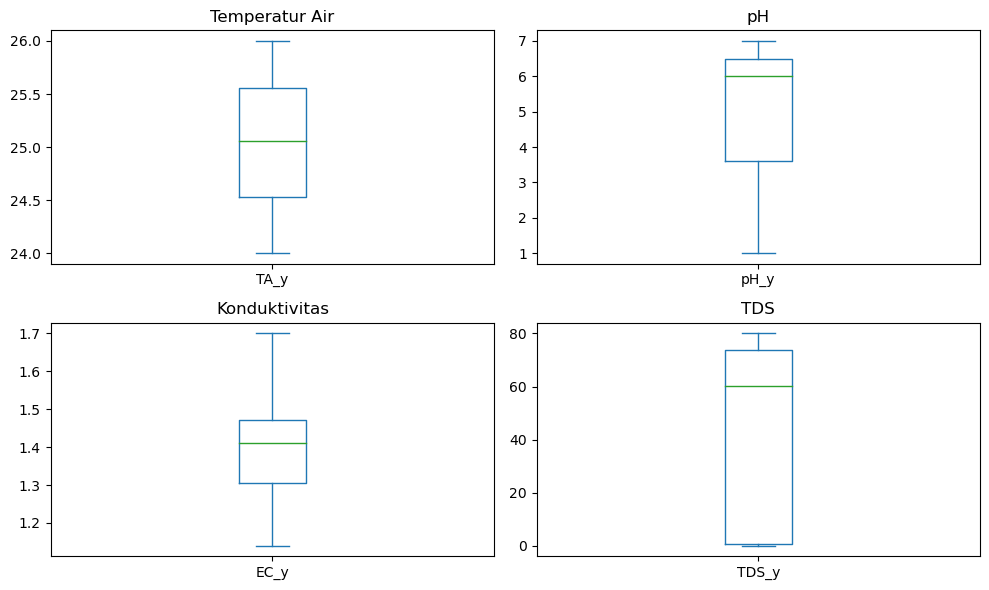

In [153]:
# Membuat subplots dengan 2 kolom
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

# Menampilkan boxplot untuk kolom "Temperatur Air" pada subplot pertama
df_validasi_TA['TA_y'].plot(kind='box', ax=axes[0, 0])
axes[0, 0].set_title('Temperatur Air')

# Menampilkan boxplot untuk kolom "pH" pada subplot kedua
df_validasi_pH['pH_y'].plot(kind='box', ax=axes[0, 1])
axes[0, 1].set_title('pH')

# Menampilkan boxplot untuk kolom "Konduktivitas" pada subplot ketiga
df_validasi_EC['EC_y'].plot(kind='box', ax=axes[1, 0])
axes[1, 0].set_title('Konduktivitas')

# Menampilkan boxplot untuk kolom "TDS" pada subplot keempat
df_validasi_TDS['TDS_y'].plot(kind='box', ax=axes[1, 1])
axes[1, 1].set_title('TDS')

# Menyesuaikan jarak vertikal antara subplot
plt.subplots_adjust(hspace=0.5)

# # Menyimpan gambar dalam format PNG
# plt.savefig('boxplot_05juni.png', dpi=400)

# Menampilkan layout subplot
plt.tight_layout()

# Menampilkan boxplot secara terpisah
plt.show()

In [154]:
## Manajemen penyimpanan file kedalam pc

In [155]:
# # Menyimpan data kedalam pc dalam bentuk excel
# with pd.ExcelWriter(data_path + savedfile, engine='xlsxwriter') as writer:
#     df_validasi_pH.to_excel(writer, sheet_name="Validasi_pH_" + namasheet)
#     df_validasi_EC.to_excel(writer, sheet_name="Validasi_EC_" + namasheet)
#     df_validasi_TDS.to_excel(writer, sheet_name="Validasi_TDS_" + namasheet)
#     df_validasi_TA.to_excel(writer, sheet_name="Validasi_TA_" + namasheet)